In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
ai_salaries= pd.read_csv(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Modified Data/ai_salaries2.csv', index_col = False)

In [5]:
# Checkign matplotlib
matplotlib.__version__

'3.10.0'

In [7]:
# Defining relevant columns
relevant = ['job_title', 'salary_usd', 'company_location', 'company_size', 'remote_ratio', 'years_experience', 'industry', 'benefits_score']

In [8]:
# Defining numerical columns
numeric_columns = ai_salaries[relevant].select_dtypes(include='number')

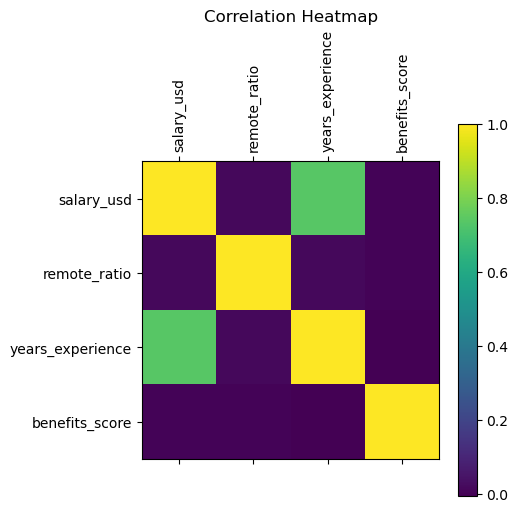

In [16]:
# Create correlation with pandas
plt.matshow(numeric_columns.corr())
plt.xticks(ticks=np.arange(len(numeric_columns.columns)), labels=numeric_columns.columns, rotation=90)
plt.yticks(ticks=np.arange(len(numeric_columns.columns)), labels=numeric_columns.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

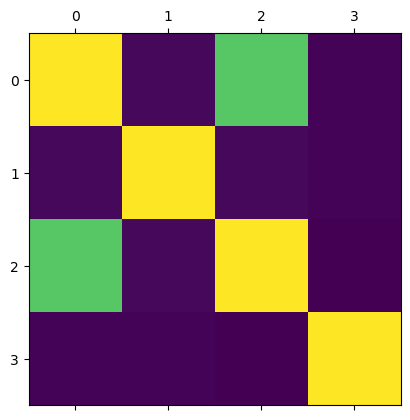

In [17]:
# Save figure
plt.matshow(numeric_columns.corr())
plt.savefig("out.png") 

In [18]:
cwd = os.getcwd()
cwd

'C:\\Users\\ab-fv\\Achievement 6 DA'

In [ ]:
# The heat map shows a strong correlation between salary and years of experience

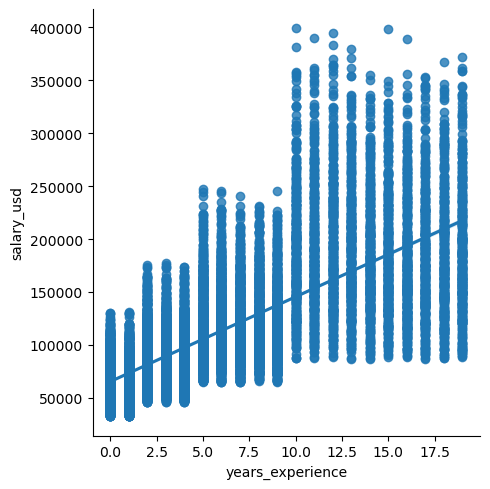

In [9]:
# Creating scatterplot
scatterplot=sns.lmplot(x = 'years_experience', y = 'salary_usd', data = numeric_columns)
scatterplot.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Visualizations/years_salary.png')

In [ ]:
# The more years of experience, the higher the salary. Aftr 10 years, salary doesn't really increase

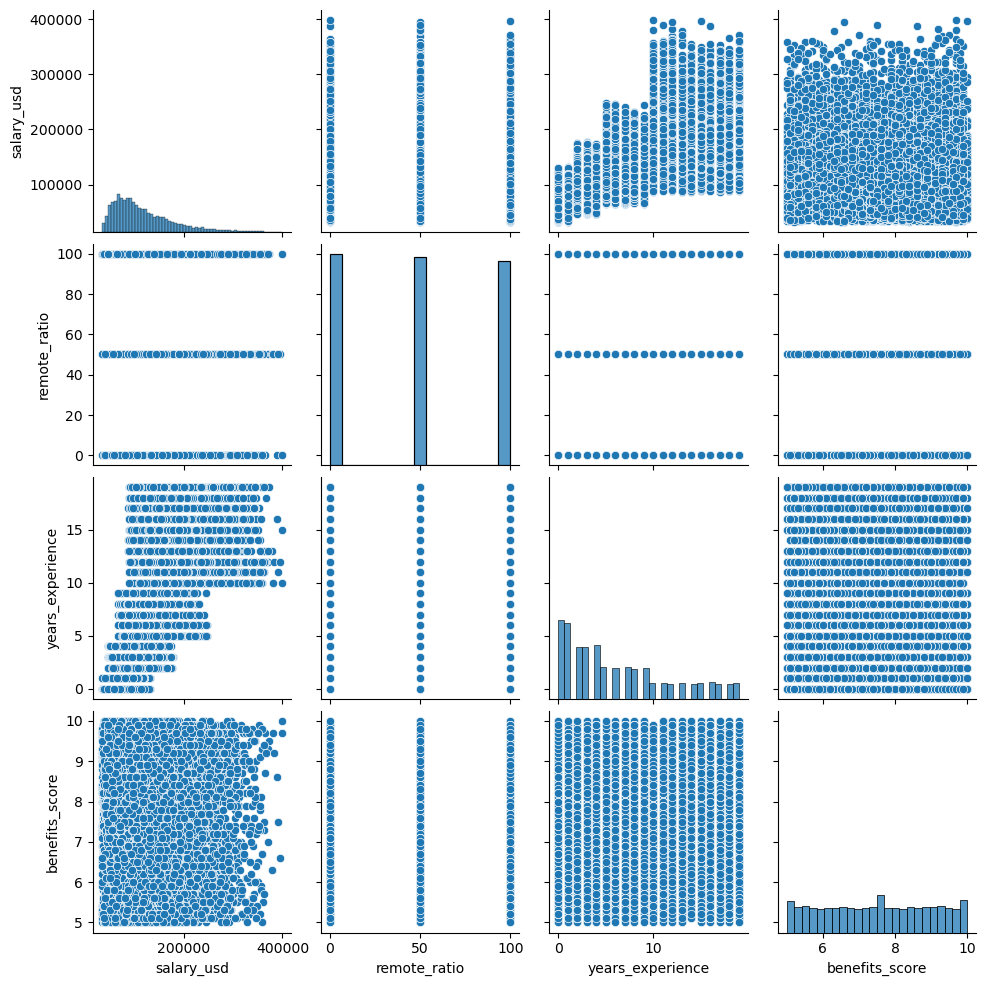

In [3]:
# Create pairplot
pairplot=sns.pairplot(ai_salaries)

In [5]:
# Save pair plot
pairplot.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Visualizations/pair_plot.png')

In [ ]:
# The two variables that seem to have some correlation are years of experience and salary. I'd like to explore
the salary per industry, company size, and location

In [6]:
# Categorcal plot

<Axes: xlabel='salary_usd', ylabel='Count'>

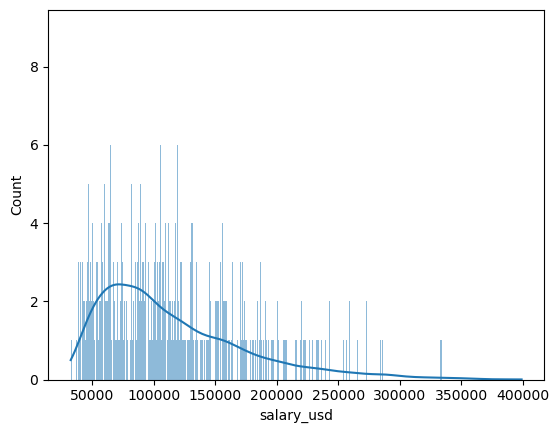

In [7]:
# Histogram
sns.histplot(ai_salaries['salary_usd'], bins = 20000, kde = True)

In [8]:
ai_salaries.loc[ai_salaries['salary_usd'] < 50000, 'Salary range'] = 'Low'

In [18]:
ai_salaries.loc[(ai_salaries['salary_usd'] >= 50000) & (ai_salaries['salary_usd'] < 100000), 'Salary range'] = 'Mid-low'

In [19]:
ai_salaries.loc[(ai_salaries['salary_usd'] >= 100000) & (ai_salaries['salary_usd'] < 150000), 'Salary range'] = 'Mid'

In [20]:
ai_salaries.loc[(ai_salaries['salary_usd'] >= 150000) & (ai_salaries['salary_usd'] < 250000), 'Salary range'] = 'Mid-high'

In [21]:
ai_salaries.loc[ai_salaries['salary_usd'] >= 250000, 'Salary range'] = 'High'

In [22]:
ai_salaries['Salary range'].value_counts(dropna = False)

Salary range
Mid-low     6392
Mid         3941
Mid-high    2928
Low         1140
High         599
Name: count, dtype: int64

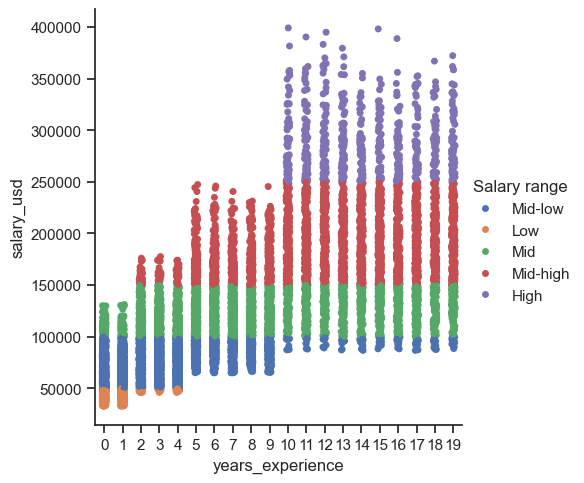

In [23]:
sns.set(style="ticks")
g = sns.catplot(x="years_experience", y="salary_usd", hue="Salary range", data=ai_salaries)

In [ ]:
## Salaries in Data Science are not low, even when there is no experience. People's salary with 10 or more years of experience
is already in the high category. Although the Mid-high category appears to be a broad range, the majority of the salaries fall into the Mid-low range.